Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [ ]:
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv('winequality.csv')

# Display the first few rows of the dataset
print("First Few Rows of Wine Quality Dataset:")
print(wine_data.head())

# Key Features and Importance Discussion
features_and_importance = {
    'Fixed Acidity': 'Measure of acids, contributes to taste and stability.',
    'Volatile Acidity': 'Amount of volatile acids, affects flavor and spoilage.',
    'Citric Acid': 'Weak acid that adds freshness and flavor to the wine.',
    'Residual Sugar': 'Amount of sugar left after fermentation, affects sweetness.',
    'Chlorides': 'Amount of salt in the wine, impacts taste and stability.',
    'Free Sulfur Dioxide': 'Used as an antioxidant and antimicrobial agent.',
    'Total Sulfur Dioxide': 'Includes both free and bound sulfur dioxide.',
    'Density': 'Related to alcohol content and sweetness of the wine.',
    'pH': 'Measures acidity or basicity, influences taste and stability.',
    'Sulphates': 'Contribute to aroma and act as antioxidants.',
    'Alcohol': 'Affects the body and mouthfeel of the wine.',
    'Quality': 'Target variable, represents overall quality based on evaluations.'
}

# Display key features and their importance
print("\nKey Features and Importance:")
for feature, importance in features_and_importance.items():
    print(f"{feature}: {importance}")


Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the Wine Quality dataset
wine_data = pd.read_csv('winequality.csv')

# Display the number of missing values in each column
print("Missing Values Before Imputation:")
print(wine_data.isnull().sum())

# Drop missing values
wine_data_dropped = wine_data.dropna()

# Mean imputation
wine_data_mean_imputed = wine_data.fillna(wine_data.mean())

# Mode imputation
wine_data_mode_imputed = wine_data.fillna(wine_data.mode().iloc[0])

# KNN imputation
imputer = KNNImputer(n_neighbors=5)
wine_data_knn_imputed = pd.DataFrame(imputer.fit_transform(wine_data), columns=wine_data.columns)

# Display the number of missing values after imputation
print("\nMissing Values After Imputation:")
print(wine_data_knn_imputed.isnull().sum())


Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

First Few Rows of Student Performance Dataset:
   study_time  attendance  socioeconomic_status  parental_involvement  \
0           5          90                     1                     3   
1           3          75                     2                     2   
2           8          95                     3                     4   
3           6          80                     1                     3   
4           7          85                     2                     4   

   prior_academic_performance  exam_score  
0                          80          85  
1                          65          70  
2                          90          92  
3                          75          78  
4                          85          88  


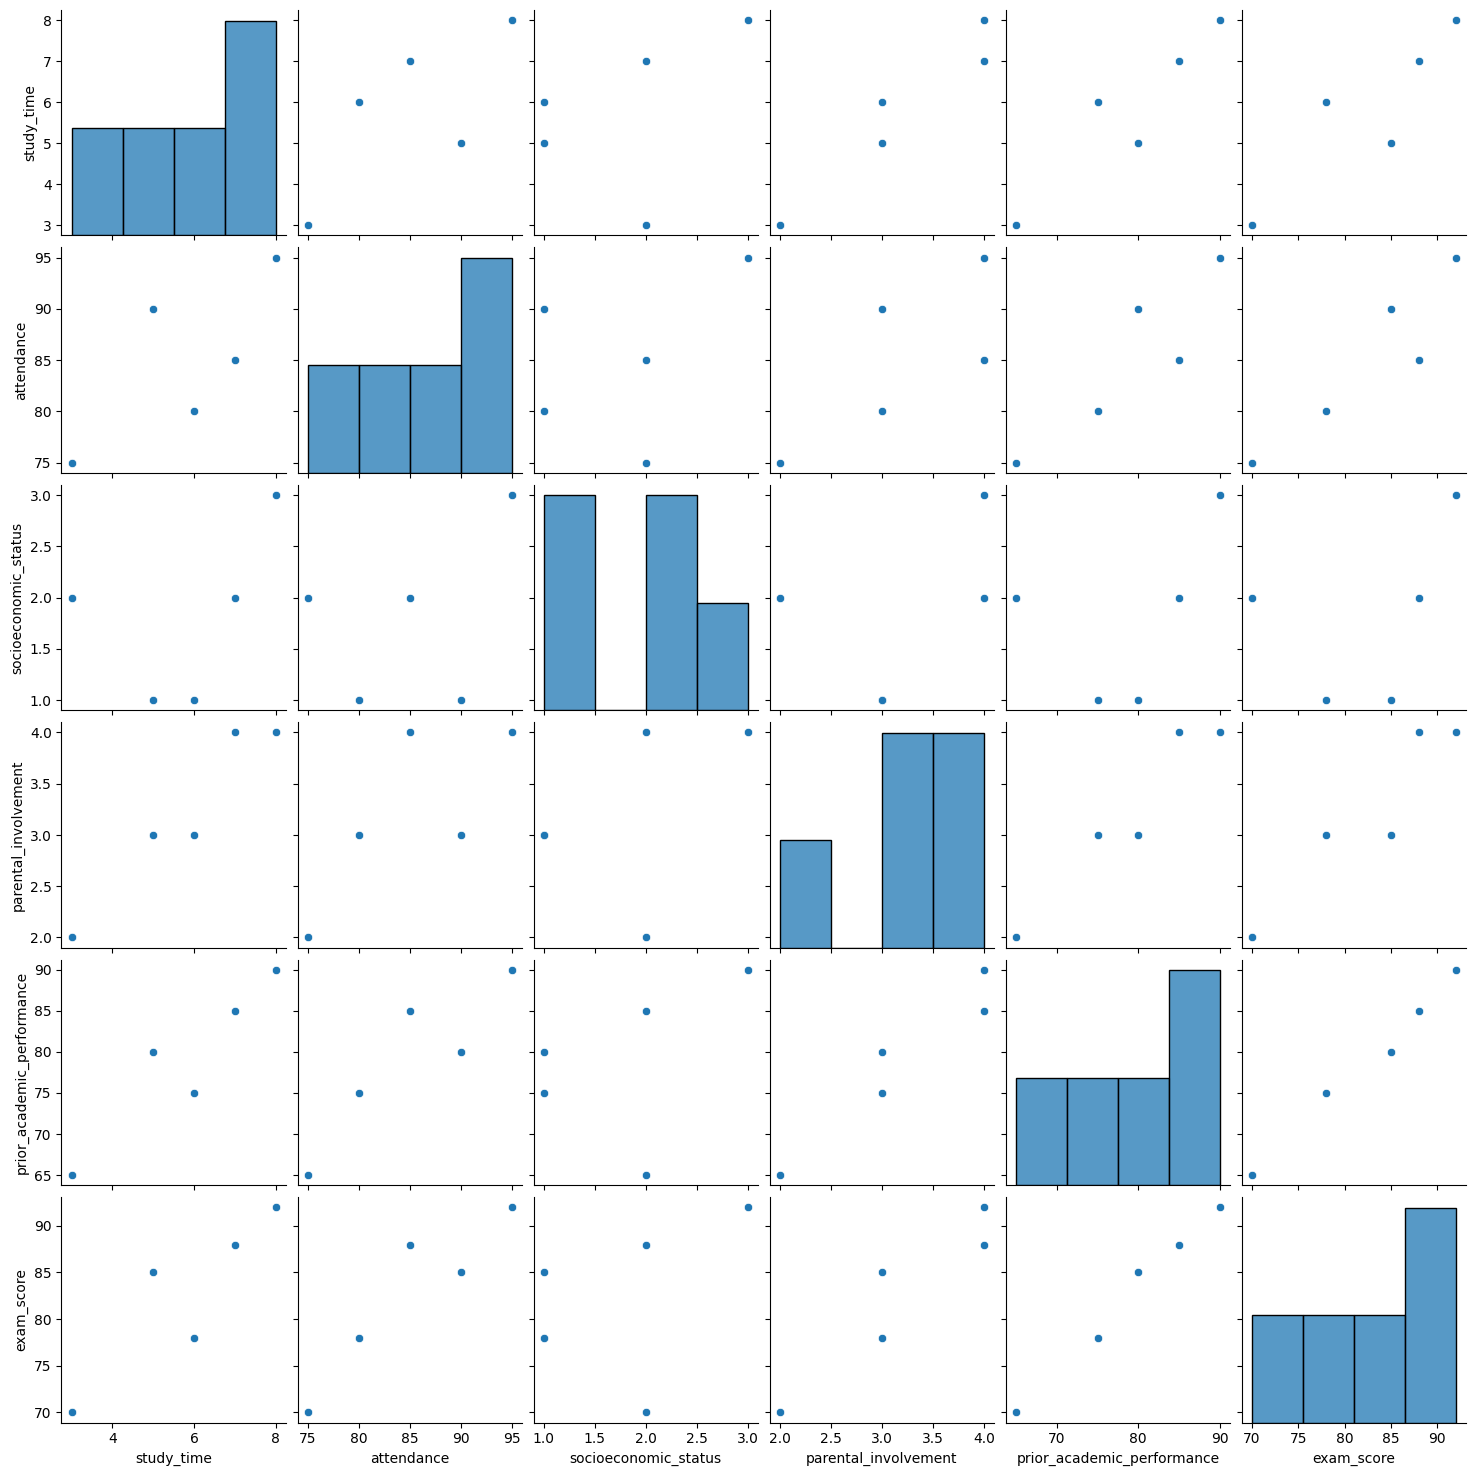


Correlation Matrix:
                            study_time  attendance  socioeconomic_status  \
study_time                    1.000000    0.739795              0.434959   
attendance                    0.739795    1.000000              0.377964   
socioeconomic_status          0.434959    0.377964              1.000000   
parental_involvement          0.963123    0.755929              0.428571   
prior_academic_performance    0.932432    0.904194              0.434959   
exam_score                    0.889715    0.926202              0.398120   

                            parental_involvement  prior_academic_performance  \
study_time                              0.963123                    0.932432   
attendance                              0.755929                    0.904194   
socioeconomic_status                    0.428571                    0.434959   
parental_involvement                    1.000000                    0.963123   
prior_academic_performance              0.9631

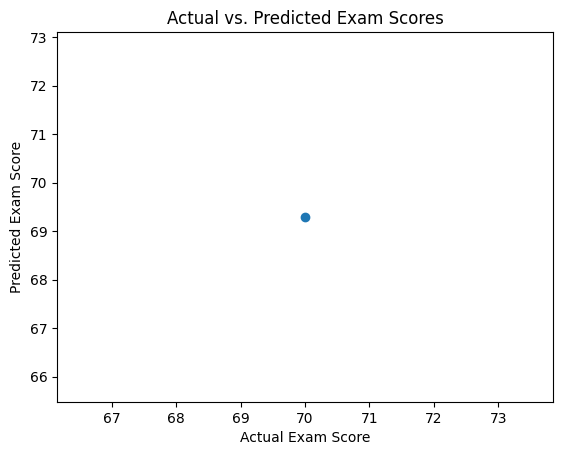

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a sample student performance dictionary
student_data_dict = {
    'study_time': [5, 3, 8, 6, 7],
    'attendance': [90, 75, 95, 80, 85],
    'socioeconomic_status': [1, 2, 3, 1, 2],
    'parental_involvement': [3, 2, 4, 3, 4],
    'prior_academic_performance': [80, 65, 90, 75, 85],
    'exam_score': [85, 70, 92, 78, 88]
}

# Create a DataFrame from the dictionary
student_data = pd.DataFrame(student_data_dict)

# Display the first few rows of the dataset
print("First Few Rows of Student Performance Dataset:")
print(student_data)

# Explore key factors affecting performance
key_factors = ['study_time', 'attendance', 'socioeconomic_status', 'parental_involvement', 'prior_academic_performance']

# Pairplot for visual exploration of relationships
sns.pairplot(student_data[key_factors + ['exam_score']])
plt.show()

# Correlation matrix to quantify relationships
correlation_matrix = student_data[key_factors + ['exam_score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(student_data[key_factors], student_data['exam_score'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Display the model coefficients
print("\nModel Coefficients:")
for factor, coefficient in zip(key_factors, model.coef_):
    print(f"{factor}: {coefficient}")

# Visualize predicted vs. actual exam scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()


Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

First Few Rows of Student Performance Dataset:
   study_time  attendance  socioeconomic_status  parental_involvement  \
0           5          90                     1                     3   
1           3          75                     2                     2   
2           8          95                     3                     4   
3           6          80                     1                     3   
4           7          85                     2                     4   

   prior_academic_performance  exam_score  
0                          80          85  
1                          65          70  
2                          90          92  
3                          75          78  
4                          85          88  


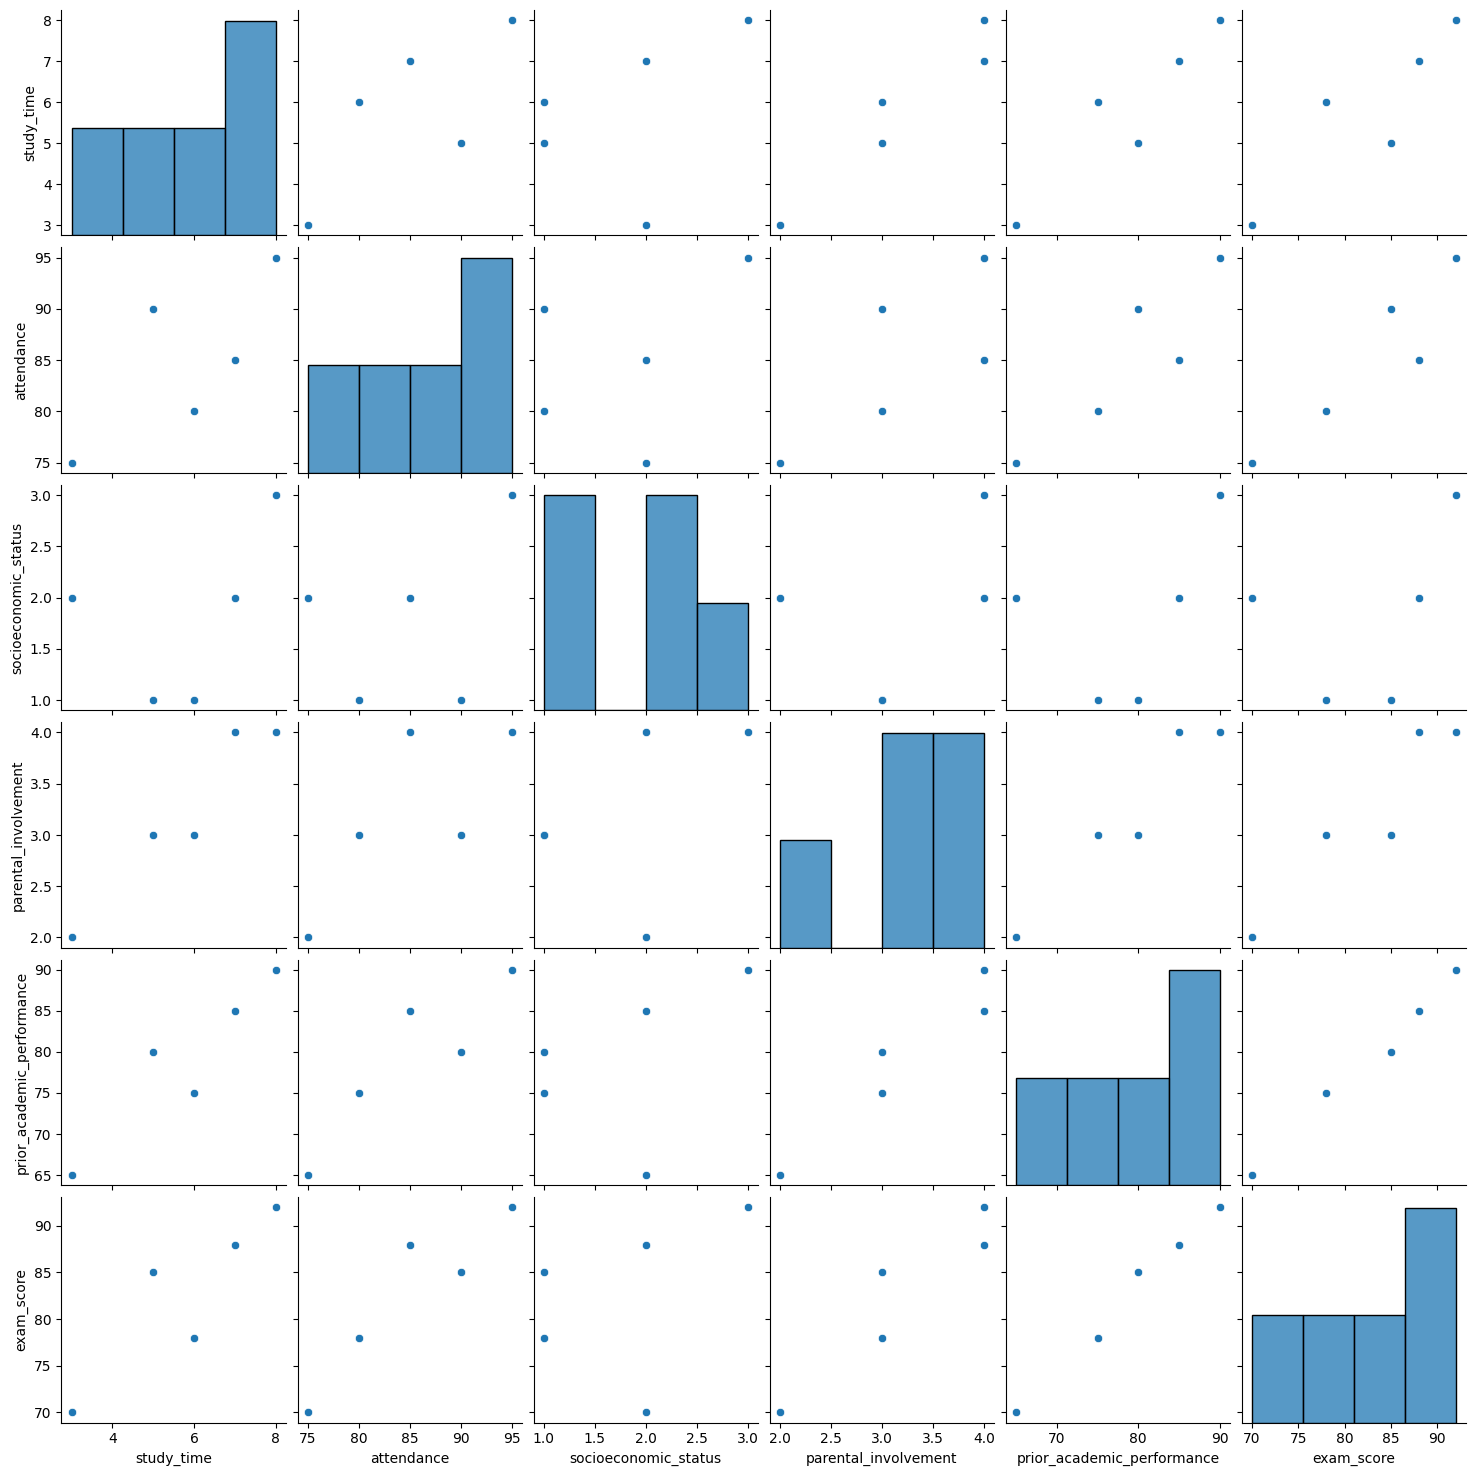


Correlation Matrix:
                            study_time  attendance  socioeconomic_status  \
study_time                    1.000000    0.739795              0.434959   
attendance                    0.739795    1.000000              0.377964   
socioeconomic_status          0.434959    0.377964              1.000000   
parental_involvement          0.963123    0.755929              0.428571   
prior_academic_performance    0.932432    0.904194              0.434959   
exam_score                    0.889715    0.926202              0.398120   

                            parental_involvement  prior_academic_performance  \
study_time                              0.963123                    0.932432   
attendance                              0.755929                    0.904194   
socioeconomic_status                    0.428571                    0.434959   
parental_involvement                    1.000000                    0.963123   
prior_academic_performance              0.9631

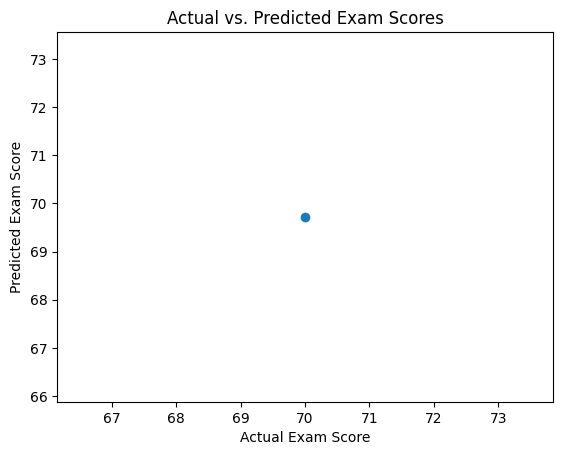

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Create a sample student performance dictionary
student_data_dict = {
    'study_time': [5, 3, 8, 6, 7],
    'attendance': [90, 75, 95, 80, 85],
    'socioeconomic_status': [1, 2, 3, 1, 2],
    'parental_involvement': [3, 2, 4, 3, 4],
    'prior_academic_performance': [80, 65, 90, 75, 85],
    'exam_score': [85, 70, 92, 78, 88]
}

# Create a DataFrame from the dictionary
student_data = pd.DataFrame(student_data_dict)

# Display the first few rows of the dataset
print("First Few Rows of Student Performance Dataset:")
print(student_data)

# Explore key factors affecting performance
key_factors = ['study_time', 'attendance', 'socioeconomic_status', 'parental_involvement', 'prior_academic_performance']

# Pairplot for visual exploration of relationships
sns.pairplot(student_data[key_factors + ['exam_score']])
plt.show()

# Correlation matrix to quantify relationships
correlation_matrix = student_data[key_factors + ['exam_score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Feature Engineering
# 1. Standardize numerical features
scaler = StandardScaler()
student_data_scaled = pd.DataFrame(scaler.fit_transform(student_data[key_factors]), columns=key_factors)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(student_data_scaled, student_data['exam_score'], test_size=0.2, random_state=42)

# 3. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# 6. Display the model coefficients
print("\nModel Coefficients:")
for factor, coefficient in zip(key_factors, model.coef_):
    print(f"{factor}: {coefficient}")

# 7. Visualize predicted vs. actual exam scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

First Few Rows of Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2              0.18         0.42             1.6       0.04   
1            6.8              0.23         0.34             1.8       0.05   
2            7.5              0.16         0.50             1.5       0.03   
3            7.3              0.20         0.36             1.7       0.04   
4            7.0              0.19         0.40             1.9       0.03   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                   31                   109    0.990  3.1        0.5   
1                   24                   129    0.993  3.2        0.6   
2                   36                    95    0.988  3.0        0.4   
3                   29                   112    0.991  3.1        0.5   
4                   32                   101    0.995  3.3        0.7   

   alcohol  quality  
0      9.5        6  
1     11

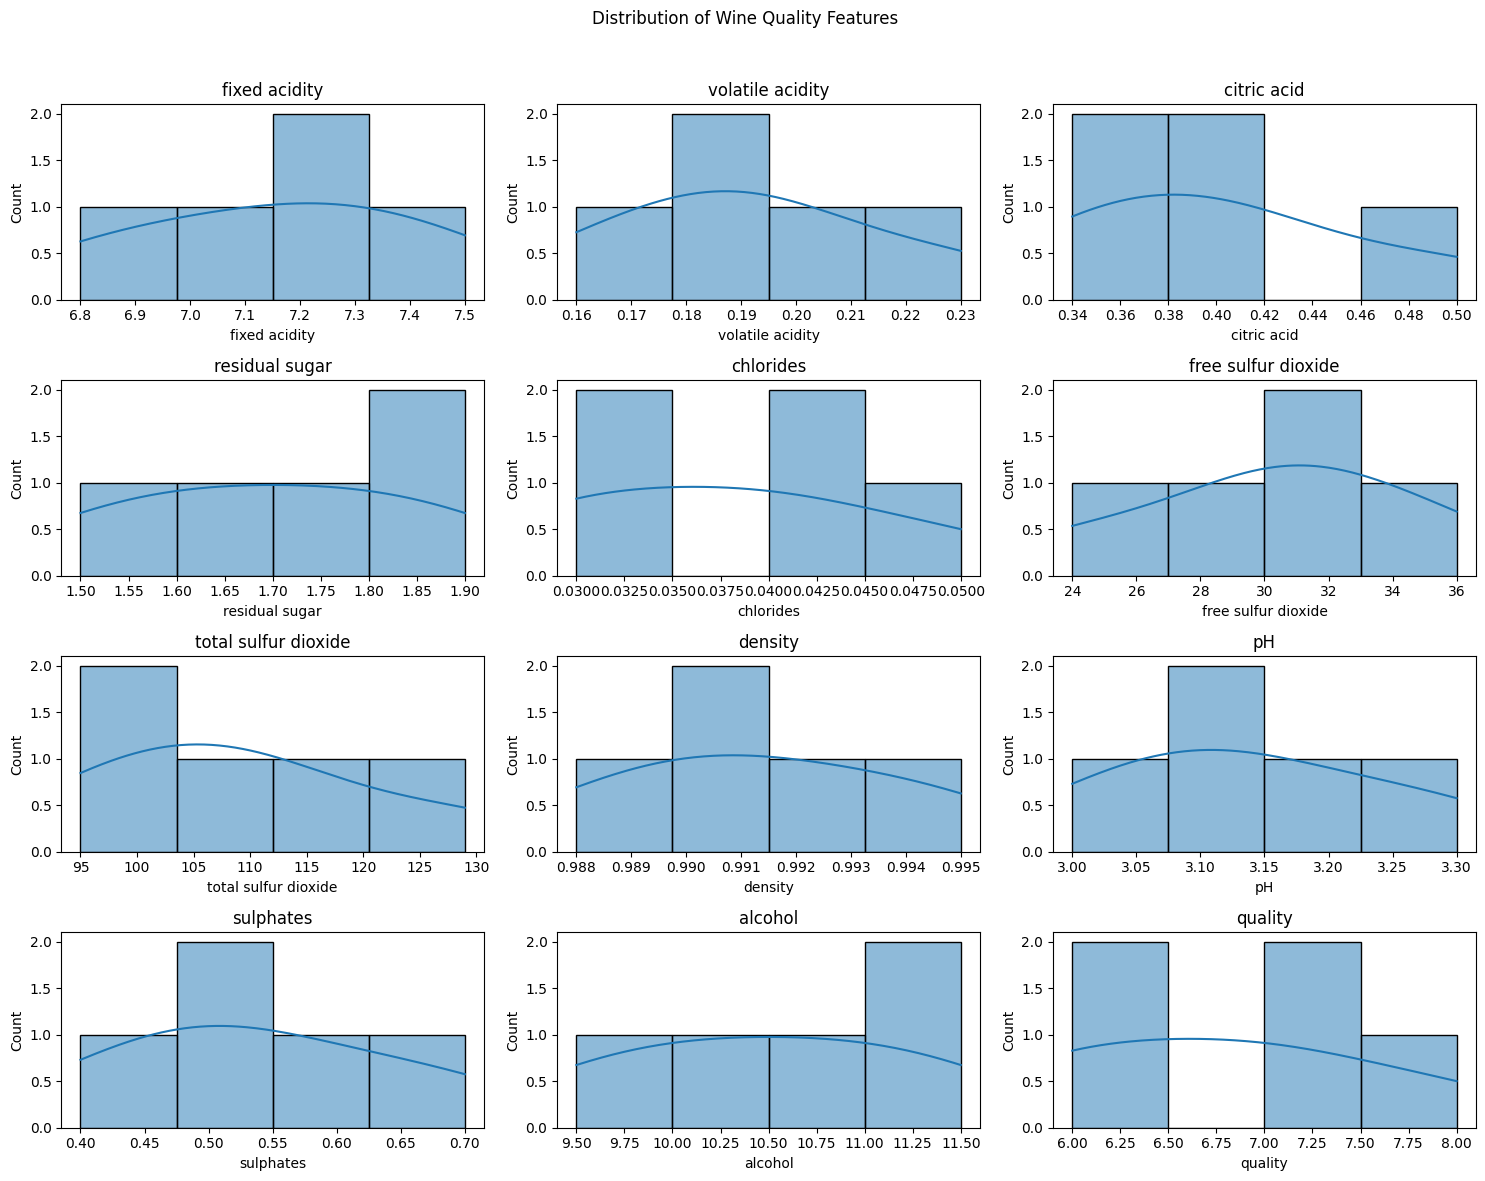

ValueError: skewtest is not valid with less than 8 samples; 5 samples were given.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from scipy.stats import normaltest

# Create a sample Wine Quality dictionary
wine_data_dict = {
    'fixed acidity': [7.2, 6.8, 7.5, 7.3, 7.0],
    'volatile acidity': [0.18, 0.23, 0.16, 0.20, 0.19],
    'citric acid': [0.42, 0.34, 0.50, 0.36, 0.40],
    'residual sugar': [1.6, 1.8, 1.5, 1.7, 1.9],
    'chlorides': [0.04, 0.05, 0.03, 0.04, 0.03],
    'free sulfur dioxide': [31, 24, 36, 29, 32],
    'total sulfur dioxide': [109, 129, 95, 112, 101],
    'density': [0.99, 0.993, 0.988, 0.991, 0.995],
    'pH': [3.1, 3.2, 3.0, 3.1, 3.3],
    'sulphates': [0.5, 0.6, 0.4, 0.5, 0.7],
    'alcohol': [9.5, 11.0, 10.5, 10.0, 11.5],
    'quality': [6, 7, 8, 6, 7]
}

# Create a DataFrame from the dictionary
wine_data = pd.DataFrame(wine_data_dict)

# Display the first few rows of the dataset
print("First Few Rows of Wine Quality Dataset:")
print(wine_data)

# Exploratory Data Analysis (EDA)
# 1. Distribution of each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Distribution of Wine Quality Features")

for i, column in enumerate(wine_data.columns):
    sns.histplot(wine_data[column], ax=axes[i // 3, i % 3], kde=True)
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Identify features with non-normality using the Shapiro-Wilk test
non_normal_features = []

for column in wine_data.columns:
    stat, p_value = normaltest(wine_data[column])
    if p_value < 0.05:  # Significance level of 0.05
        non_normal_features.append(column)

print("\nFeatures with Non-Normal Distribution:")
print(non_normal_features)

# 3. Apply transformations to improve normality
for feature in non_normal_features:
    # Log transformation
    wine_data[feature + '_log'] = wine_data[feature].apply(lambda x: None if x == 0 else np.log(x + 1))

    # Box-Cox transformation
    transformed_data, _ = boxcox(wine_data[feature].dropna() + 1)
    wine_data[feature + '_boxcox'] = transformed_data

# Display transformed features
print("\nTransformed Features:")
print(wine_data.head())

# 4. Visualize the transformed features
fig, axes = plt.subplots(nrows=2, ncols=len(non_normal_features), figsize=(15, 6))
fig.suptitle("Transformed Features Distribution")

for i, feature in enumerate(non_normal_features):
    sns.histplot(wine_data[feature + '_log'], ax=axes[0, i], kde=True)
    axes[0, i].set_title(feature + ' (Log Transformation)')

    sns.histplot(wine_data[feature + '_boxcox'], ax=axes[1, i], kde=True)
    axes[1, i].set_title(feature + ' (Box-Cox Transformation)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

First Few Rows of Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2              0.18         0.42             1.6       0.04   
1            6.8              0.23         0.34             1.8       0.05   
2            7.5              0.16         0.50             1.5       0.03   
3            7.3              0.20         0.36             1.7       0.04   
4            7.0              0.19         0.40             1.9       0.03   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                   31                   109    0.990  3.1        0.5   
1                   24                   129    0.993  3.2        0.6   
2                   36                    95    0.988  3.0        0.4   
3                   29                   112    0.991  3.1        0.5   
4                   32                   101    0.995  3.3        0.7   

   alcohol  quality  
0      9.5        6  
1     11

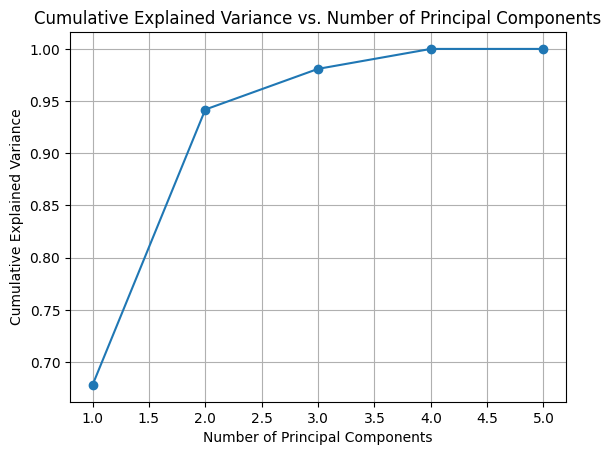


Minimum Number of Principal Components for 90% Variance: 2

Principal Components DataFrame:
        PC1       PC2
0  1.242983 -1.037664
1 -3.725802 -1.427963
2  4.300508  0.416614
3  0.018074 -1.111562
4 -1.835763  3.160576


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a sample Wine Quality dictionary
wine_data_dict = {
    'fixed acidity': [7.2, 6.8, 7.5, 7.3, 7.0],
    'volatile acidity': [0.18, 0.23, 0.16, 0.20, 0.19],
    'citric acid': [0.42, 0.34, 0.50, 0.36, 0.40],
    'residual sugar': [1.6, 1.8, 1.5, 1.7, 1.9],
    'chlorides': [0.04, 0.05, 0.03, 0.04, 0.03],
    'free sulfur dioxide': [31, 24, 36, 29, 32],
    'total sulfur dioxide': [109, 129, 95, 112, 101],
    'density': [0.99, 0.993, 0.988, 0.991, 0.995],
    'pH': [3.1, 3.2, 3.0, 3.1, 3.3],
    'sulphates': [0.5, 0.6, 0.4, 0.5, 0.7],
    'alcohol': [9.5, 11.0, 10.5, 10.0, 11.5],
    'quality': [6, 7, 8, 6, 7]
}

# Create a DataFrame from the dictionary
wine_data = pd.DataFrame(wine_data_dict)

# Display the first few rows of the dataset
print("First Few Rows of Wine Quality Dataset:")
print(wine_data)

# Separate features and target variable
X = wine_data.drop('quality', axis=1)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Determine the minimum number of principal components for 90% variance
min_components = (cumulative_explained_variance >= 0.9).argmax() + 1
print(f"\nMinimum Number of Principal Components for 90% Variance: {min_components}")

# Display the principal components
pca_columns = [f'PC{i}' for i in range(1, min_components + 1)]
X_pca_df = pd.DataFrame(data=X_pca[:, :min_components], columns=pca_columns)
print("\nPrincipal Components DataFrame:")
print(X_pca_df.head())
